In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.size'] = 8

# Exercise 1
---

In [9]:
df = pd.read_csv('data/Ex1 data', sep='\t', header=None, names=['x', 'y']).sort_values('x')
df['x^2'] = df['x'] ** 2
df['1'] = 1
df

,x,y,x^2,1
26,-0.977839,0.389470,0.956168,1
9,-0.932743,0.664402,0.870010,1
7,-0.843831,0.697727,0.712050,1
23,-0.827763,0.686867,0.685192,1
3,-0.809909,0.605548,0.655952,1
6,-0.768064,0.575719,0.589922,1
12,-0.710154,0.673122,0.504319,1
22,-0.653467,0.797983,0.427020,1
10,-0.615699,0.650856,0.379086,1
29,-0.546405,0.821832,0.298558,1


In [10]:
import statsmodels.api as sm

# linear regression
X = df['x']
y = df['y']
X = sm.add_constant(X)
linear_model = sm.OLS(y, X).fit()
df['linear'] = linear_model.fittedvalues
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     123.3
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           9.11e-12
Time:                        19:57:51   Log-Likelihood:                 27.429
No. Observations:                  30   AIC:                            -50.86
Df Residuals:                      28   BIC:                            -48.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0004      0.021     48.641      0.000       0.958       1.043
x              0.4308      0.039     11.102      0.000       0.351       0.510
==============================================================================
Omnibus:                        4.481   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                1.712
Skew:                          -0.118   Prob(JB):                        0.425
Kurtosis:                       1.854   Cond. No.                         2.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# quadratic regression
X = df[['x', 'x^2']]
y = df['y']
X = sm.add_constant(X)
quad_model = sm.OLS(y, X).fit()
df['quadratic'] = quad_model.fittedvalues
quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     71.36
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           1.67e-11
Time:                        19:57:52   Log-Likelihood:                 29.702
No. Observations:                  30   AIC:                            -53.40
Df Residuals:                      27   BIC:                            -49.20
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0296      0.024     43.134      0.000       0.981       1.079
x              0.3861      0.042      9.116      0.000       0.299       0.473
x^2           -0.1422      0.068     -2.102      0.045      -0.281      -0.003
==============================================================================
Omnibus:                        7.588   Durbin-Watson:                   2.332
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                2.194
Skew:                          -0.154   Prob(JB):                        0.334
Kurtosis:                       1.712   Cond. No.                         4.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# solve normal equation
def linear_reg(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y


# linear model
X = df[['1', 'x']].values
y = df['y'].values
w = linear_reg(X, y)
df['linear'] = X @ w
mse = np.mean((df['linear'] - df['y'])**2)
print(f'Linear Model: \n w0 = {w[0]} \n w1 = {w[1]} \n MSE = {mse} \n')

# quadratic model
X = df[['1', 'x', 'x^2']].values
y = df['y'].values
w = linear_reg(X, y)
df['quadratic'] = X @ w
mse = np.mean((df['quadratic'] - df['y'])**2)
print(
    f'Quadratic Model: \n w0 = {w[0]} \n w1 = {w[1]} \n w2 = {w[2]} \n MSE = {mse} \n'
)

Linear Model: 
 w0 = 1.0003868066231683 
 w1 = 0.43083834470396554 
 MSE = 0.009405599894797913 

Quadratic Model: 
 w0 = 1.0295683746564657 
 w1 = 0.38614333403232315 
 w2 = -0.14215111308615916 
 MSE = 0.008083110784509665 



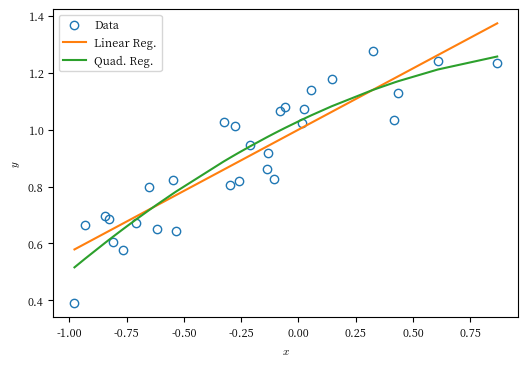

In [13]:
# plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(df['x'], df['y'], 'o', mfc='none', label='Data')
ax.plot(df['x'], df['linear'], label='Linear Reg.')
ax.plot(df['x'], df['quadratic'], label='Quad. Reg.')
ax.legend()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

fig.savefig('img/HW2_Ex1.pdf', bbox_inches='tight')

# Exercise 7
---

In [14]:
# Gaussian basis functions
basis = [lambda x: np.ones_like(x)] + [
    lambda x, j=j: np.exp(-(x - 0.2 * (j - 12.5))**2) for j in range(1, 25)
]

# calculate real value
x = pd.read_csv(f'data/Ex7 data/data_1',
                sep='     ',
                engine='python',
                header=None,
                usecols=[0]).values.flatten()
h = np.sin(np.pi * x)


# fit model
def process_lth_data(l, lam):
    # load data
    df = pd.read_csv(f'data/Ex7 data/data_{l}',
                     sep='     ',
                     engine='python',
                     header=None,
                     names=['x', 'y'])
    # design matrix and target vector
    X = np.array([b(df['x'].values) for b in basis]).T
    y = df['y'].values
    # parameter estimator
    w = np.linalg.inv(X.T @ X + lam * np.eye(X.shape[1])) @ X.T @ y
    return w, X, y


h

array([-1.22464680e-16, -2.58819044e-01, -5.00000001e-01, -7.07106781e-01,
       -8.66025403e-01, -9.65925827e-01, -1.00000000e+00, -9.65925827e-01,
       -8.66025403e-01, -7.07106781e-01, -5.00000001e-01, -2.58819044e-01,
        0.00000000e+00,  2.58819044e-01,  5.00000001e-01,  7.07106781e-01,
        8.66025403e-01,  9.65925827e-01,  1.00000000e+00,  9.65925827e-01,
        8.66025403e-01,  7.07106781e-01,  5.00000001e-01,  2.58819044e-01,
        1.22464680e-16])

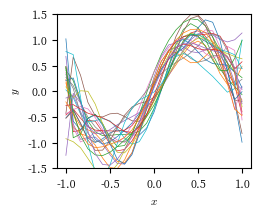

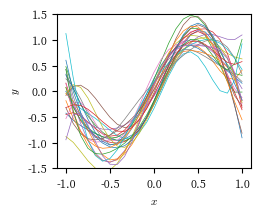

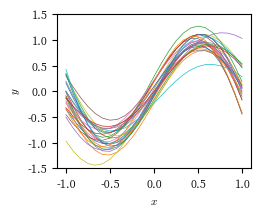

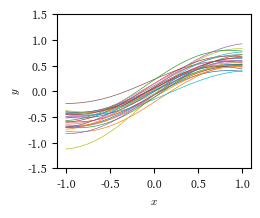

In [15]:
# problem 2
L = 25
LOG10_LAMBDA = [-10, -5, -1, 1]

# plot fits
for loglam in LOG10_LAMBDA:
    fig, ax = plt.subplots(figsize=(2.5, 2))
    for l in range(1, L + 1):
        w, X, y = process_lth_data(l, 10**loglam)
        ax.plot(x, X @ w, linewidth=0.5)
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$y$')
        ax.set_ylim(-1.5, 1.5)


    # ax.plot(df['x'], h)
    fig.savefig(f'img/HW2_Ex7_lambda_{loglam}.pdf', bbox_inches='tight')

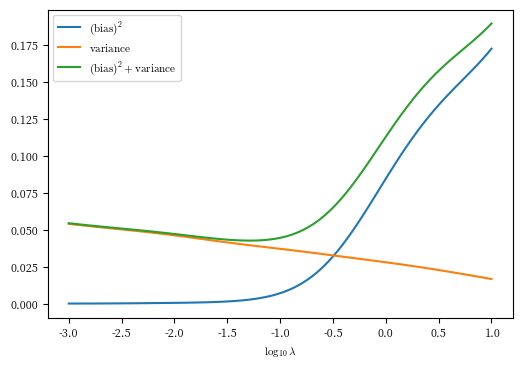

In [16]:
# problem 3
L = 100
LOG10_LAMBDA = np.linspace(-3, 1, 100)

bias2 = []
variance = []
for loglam in LOG10_LAMBDA:
    preds = []
    for l in range(1, L + 1):
        w, X, y = process_lth_data(l, 10**loglam)
        preds.append(X @ w)

    mean = np.mean(preds, axis=0)
    bias2.append(np.mean((mean - h)**2))
    variance.append(np.mean(np.mean((preds - mean)**2, axis=0)))

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(LOG10_LAMBDA, bias2, label=r'$(\mathrm{bias})^2$')
ax.plot(LOG10_LAMBDA, variance, label=r'$\mathrm{variance}$')
ax.plot(LOG10_LAMBDA, [a + b for a, b in zip(bias2, variance)],
        label=r'$(\mathrm{bias})^2+\mathrm{variance}$')
ax.legend()
ax.set_xlabel(r'$\log_{10} \lambda$')
fig.savefig('img/HW2_Ex7_bias_variance.pdf', bbox_inches='tight')

# Exercise 8
---

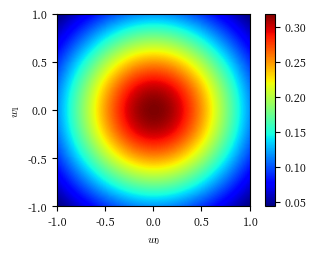

In [17]:
import scipy.stats as stats


def plot_heatmap(z, filename):
    fig, ax = plt.subplots(figsize=(4, 2.5))
    im = ax.imshow(z, extent=[-1, 1, -1, 1], cmap='jet')
    ax.set_xlabel(r'$w_0$')
    ax.set_ylabel(r'$w_1$')
    ax.set_xticks(np.linspace(-1, 1, 5))
    ax.set_yticks(np.linspace(-1, 1, 5))
    fig.colorbar(im)
    fig.savefig(filename, bbox_inches='tight')


# problem 1

mu0 = np.zeros(2)
Sigma0 = 0.5 * np.eye(2)
sigma = 0.25

invSigma0 = np.linalg.inv(Sigma0)

# calculate gaussian prior
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
z = stats.multivariate_normal.pdf(pos, mu0, Sigma0)

# plot prior
plot_heatmap(z, 'img/HW2_Ex8_prior.pdf')

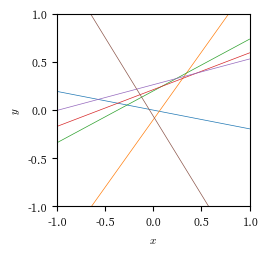

In [18]:
np.random.seed(2022)


def plot_sample(mu, Sigma, filename):
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    x = np.linspace(-1, 1, 100)
    for i in range(6):
        w = np.random.multivariate_normal(mu, Sigma)
        # y = w0 + w1 x
        ax.plot(x, w[0] + w[1] * x, linewidth=0.5)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_xticks(np.linspace(-1, 1, 5))
    ax.set_yticks(np.linspace(-1, 1, 5))
    ax.set_aspect('equal')
    fig.savefig(filename, bbox_inches='tight')


# problem 2
# sample six times from prior and plot six lines
plot_sample(mu0, Sigma0, 'img/HW2_Ex8_sample.pdf')

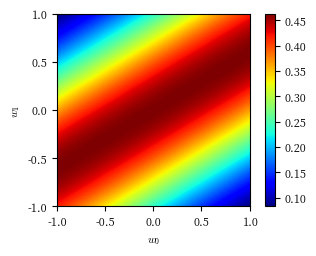

In [19]:
# problem 3

x1, y1 = (0.6, 0)

# define likelihood
X1 = np.array([1, x1])
mu_y = lambda mu: X1 @ mu
Sigma_y = X1 @ Sigma0 @ X1.T + sigma**2


def likelihood(mu):
    return stats.multivariate_normal.pdf(y1, mu_y(mu), Sigma_y)


likelihood = np.vectorize(likelihood, signature='(2)->()')

# calculate likelihood
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
z = likelihood(pos)

# plot likelihood
plot_heatmap(z, 'img/HW2_Ex8_likelihood.pdf')


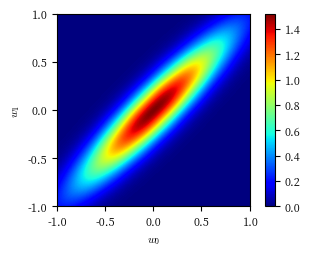

In [20]:
# problem 4

# define posterior
X1 = np.array([1, x1])
Sigma1 = np.linalg.inv(invSigma0 + X1.T @ X1 / sigma**2)
mu1 = Sigma1 @ (invSigma0 @ mu0 + X1 * y1 / sigma**2)

# calculate posterior
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
z = stats.multivariate_normal.pdf(pos, mu1, Sigma1)

# plot posterior
plot_heatmap(z, 'img/HW2_Ex8_posterior.pdf')

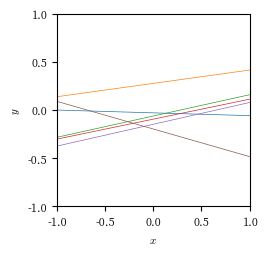

In [21]:
np.random.seed(2022)

# problem 5
# sample six times from posterior and plot six lines
plot_sample(mu1, Sigma1, 'img/HW2_Ex8_sample_posterior.pdf')

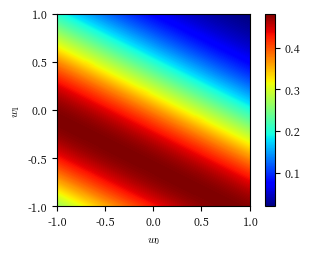

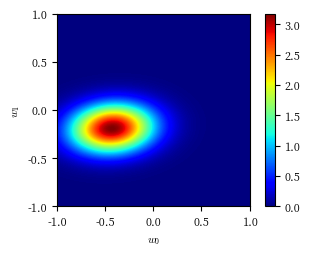

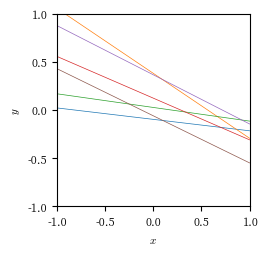

In [22]:
# problem 6

x2, y2 = (-0.5, 0.6)

# define likelihood
X2 = np.array([1, x2])
mu_y = lambda mu: X2 @ mu
Sigma_y = X2 @ Sigma0 @ X2.T + sigma**2


def likelihood(mu):
    return stats.multivariate_normal.pdf(y2, mu_y(mu), Sigma_y)


likelihood = np.vectorize(likelihood, signature='(2)->()')

# calculate likelihood
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
z = likelihood(pos)

# plot likelihood
plot_heatmap(z, 'img/HW2_Ex8_likelihood2.pdf')

# define posterior
X = np.array([X1, X2])
y = np.array([y1, y2])
Sigma2 = np.linalg.inv(invSigma0 + X.T @ X / sigma**2)
mu2 = Sigma2 @ (invSigma0 @ mu0 + X @ y / sigma**2)

# calculate and plot posterior
z = stats.multivariate_normal.pdf(pos, mu2, Sigma2)
plot_heatmap(z, 'img/HW2_Ex8_posterior2.pdf')

# sample six times from posterior and plot six lines
plot_sample(mu2, Sigma2, 'img/HW2_Ex8_sample_posterior2.pdf')